# **IN-VEHICLE COUPON RECOMMENDATION**

---





*  NAME: GAYATHRI GIRISH
*  ORGANISATION: ENTRI ELEVATE
*  DATE:

---






**1.OVERVIEW OF THE PROBLEM:**

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and asks the person whether they will accept the coupon if they are the driver. The objective is to develop an effective prediction model to determine whether a driver will accept a coupon based on the provided scenario.

**2.OBJECTIVE:**

To develop the best prediction model for determining the likelihood of coupon acceptance using machine learning techniques.

**3.DATA DESCRIPTION:**

* ***Source***: UCI Repository
* ***Features***:
destination, passanger, weather, temperature, time,coupon, expiration, gender, age, maritalStatus, has_Children, education, occupation, income, Car,Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y



In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**4.DATA COLLECTION**

In [351]:
df = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [353]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [354]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [355]:
# Summary statistics
print(df.describe())

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

**5.DATA PREPROCESSING**

*i.handle missing values*

In [356]:
# Fill missing values without using inplace to avoid warnings
df['Bar'] = df['Bar'].fillna(df['Bar'].mode()[0])
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df['CarryAway'] = df['CarryAway'].fillna(df['CarryAway'].mode()[0])
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])

In [357]:
# Drop columns with excessive missing values
if 'car' in df.columns:
    df = df.drop(columns=['car'])

In [358]:
#Replace age categories with numerical values
df['age'] = df['age'].replace({'below21': 20, '50plus': 50})
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [359]:
# Treat invalid 'age' values (like 0) as NaN
df.loc[df['age'] == 0, 'age'] = np.nan

In [360]:
#Drop duplicate rows
df = df.drop_duplicates()

In [361]:
#Check for remaining missing values
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


Missing Values After Preprocessing:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [362]:
#Fill remaining missing numerical values with median
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())

In [363]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [364]:
# One-Hot Encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

In [365]:
print("\nData after Preprocessing:")
print(df.head())


Data after Preprocessing:
   temperature  gender   age  has_children  toCoupon_GEQ5min  \
0           55       0  21.0             1                 1   
1           80       0  21.0             1                 1   
2           80       0  21.0             1                 1   
3           80       0  21.0             1                 1   
4           80       0  21.0             1                 1   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y  \
0                  0                  0               0              1  1   
1                  0                  0               0              1  0   
2                  1                  0               0              1  1   
3                  1                  0               0              1  0   
4                  1                  0               0              1  0   

   ...  CarryAway_less1  CarryAway_never  RestaurantLessThan20_4~8  \
0  ...            False            False               

In [366]:
# Boxplots for numerical columns
def plot_boxplots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

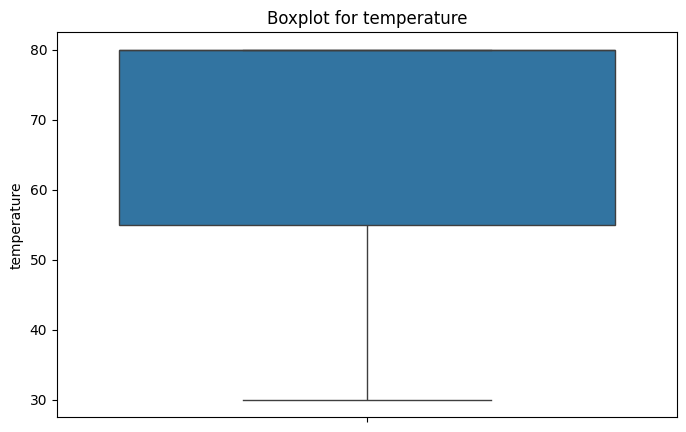

In [367]:
numerical_cols = ['temperature']
plot_boxplots(df, numerical_cols)

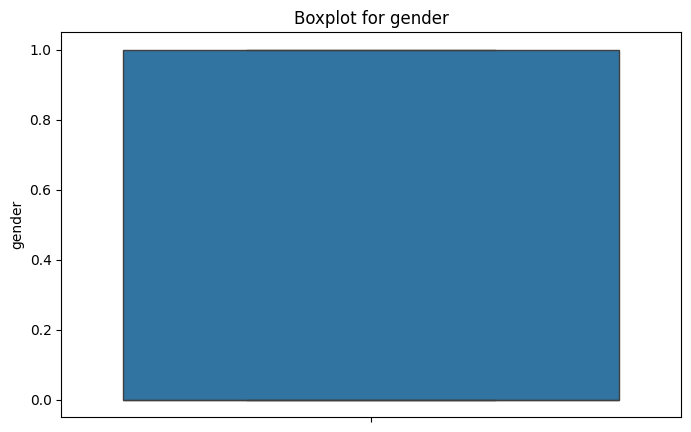

In [368]:
numerical_cols = ['gender']
plot_boxplots(df, numerical_cols)

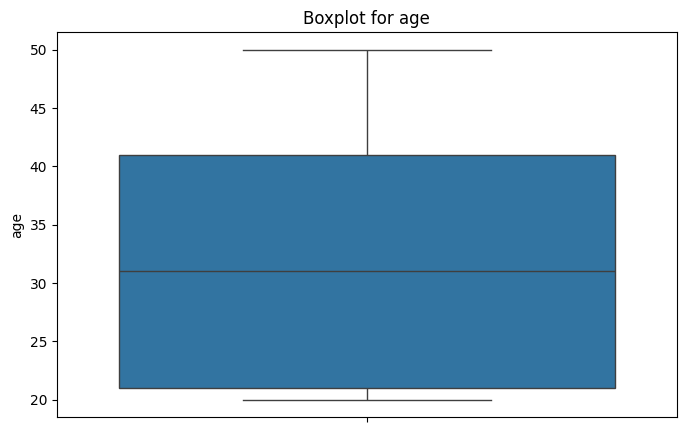

In [369]:
numerical_cols = ['age']
plot_boxplots(df, numerical_cols)

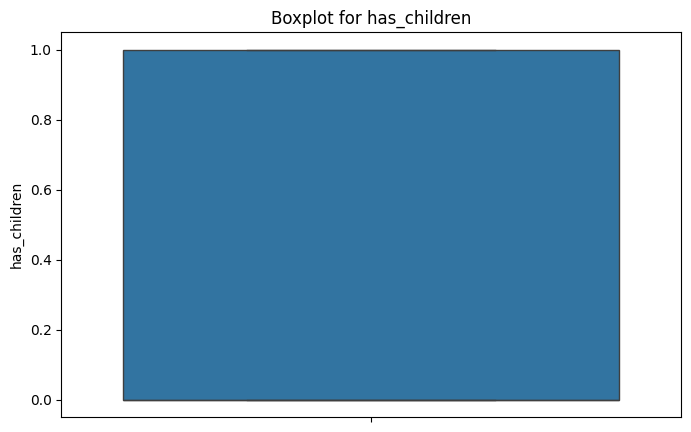

In [370]:
numerical_cols = ['has_children']
plot_boxplots(df, numerical_cols)

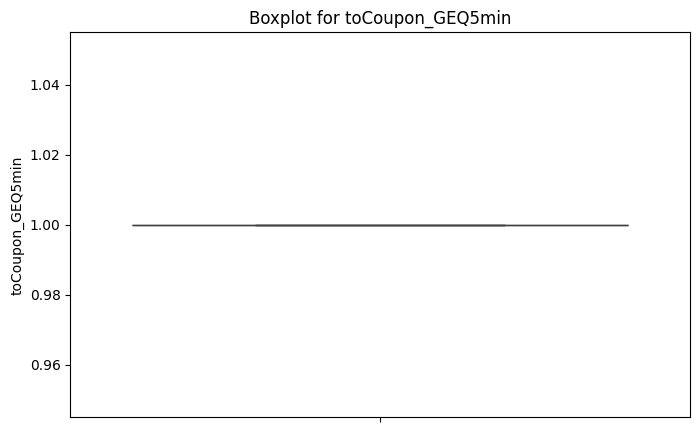

In [371]:
numerical_cols = ['toCoupon_GEQ5min']
plot_boxplots(df, numerical_cols)

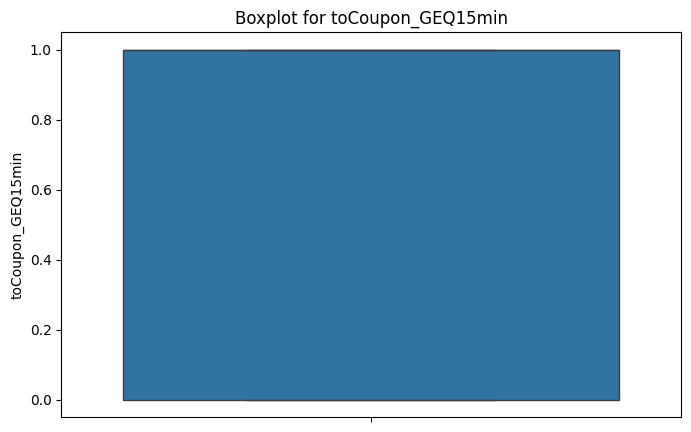

In [372]:
numerical_cols = ['toCoupon_GEQ15min']
plot_boxplots(df, numerical_cols)

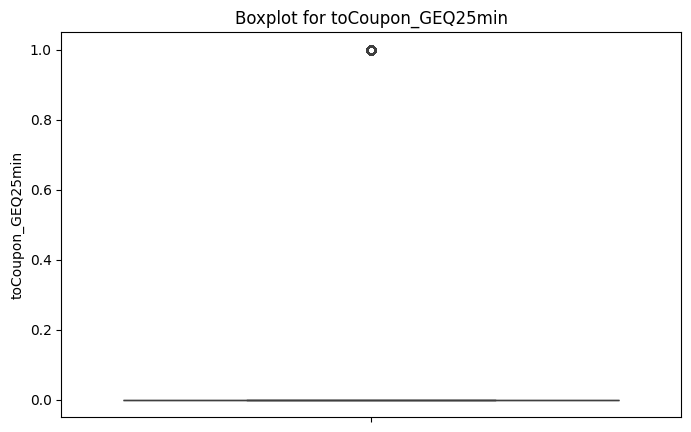

In [373]:
numerical_cols = ['toCoupon_GEQ25min']
plot_boxplots(df, numerical_cols)

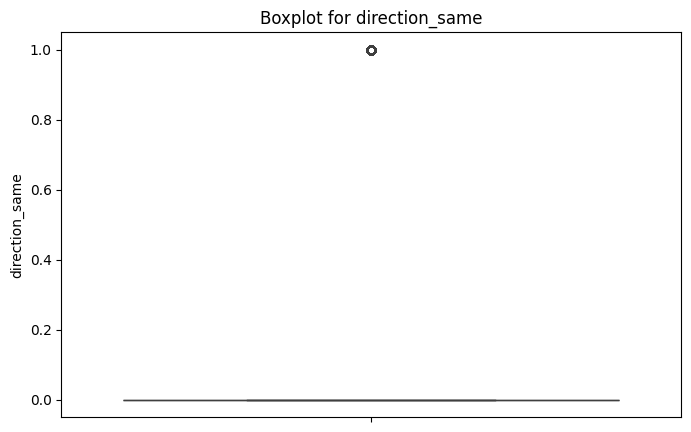

In [374]:
numerical_cols = ['direction_same']
plot_boxplots(df, numerical_cols)

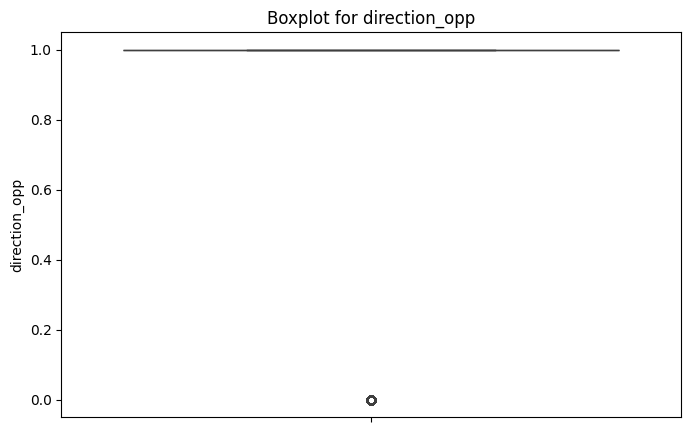

In [375]:
numerical_cols = ['direction_opp']
plot_boxplots(df, numerical_cols)

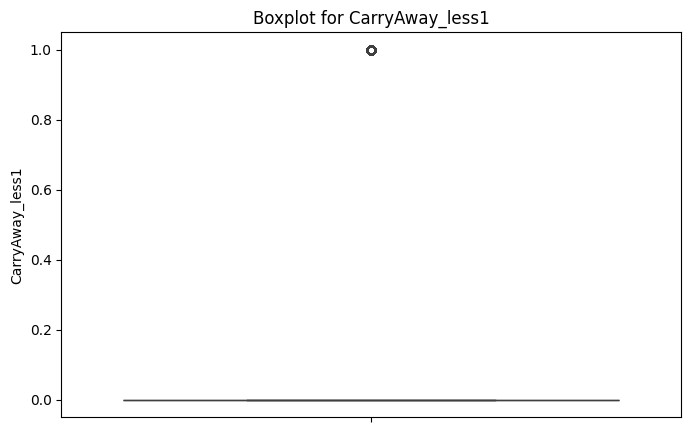

In [376]:
numerical_cols = ['CarryAway_less1']
plot_boxplots(df, numerical_cols)

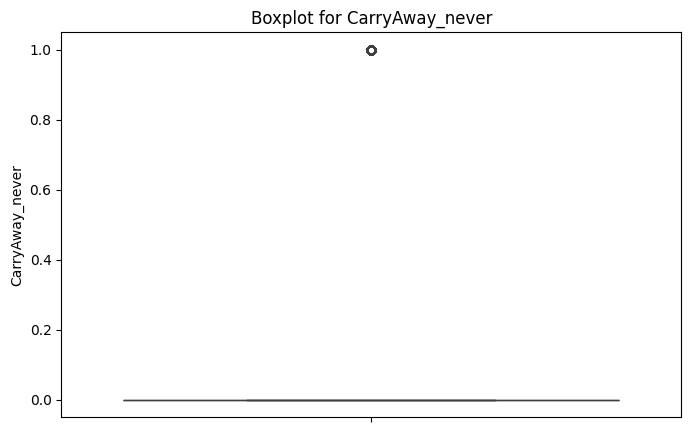

In [377]:
numerical_cols = ['CarryAway_never']
plot_boxplots(df, numerical_cols)

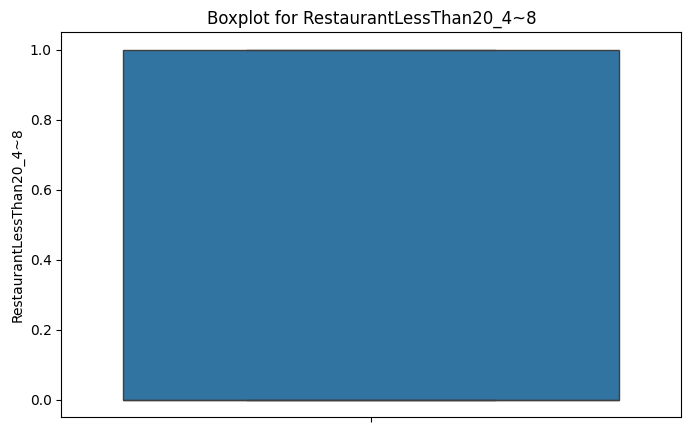

In [378]:
numerical_cols = ['RestaurantLessThan20_4~8']
plot_boxplots(df, numerical_cols)

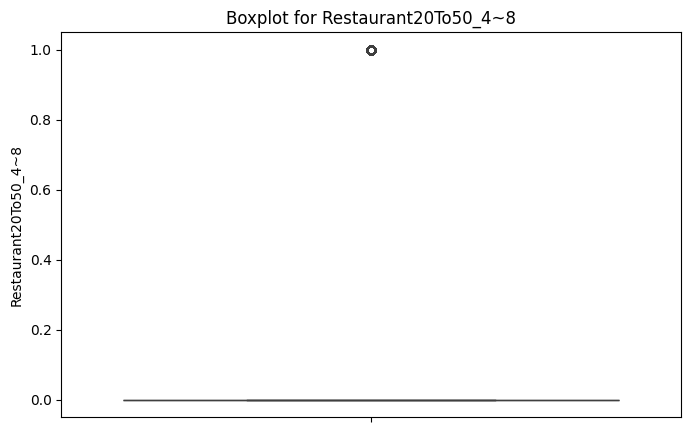

In [379]:
numerical_cols = ['Restaurant20To50_4~8']
plot_boxplots(df, numerical_cols)

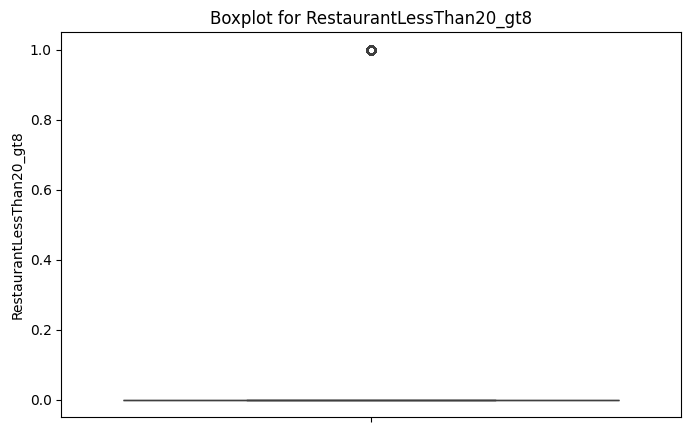

In [380]:
numerical_cols = ['RestaurantLessThan20_gt8']
plot_boxplots(df, numerical_cols)

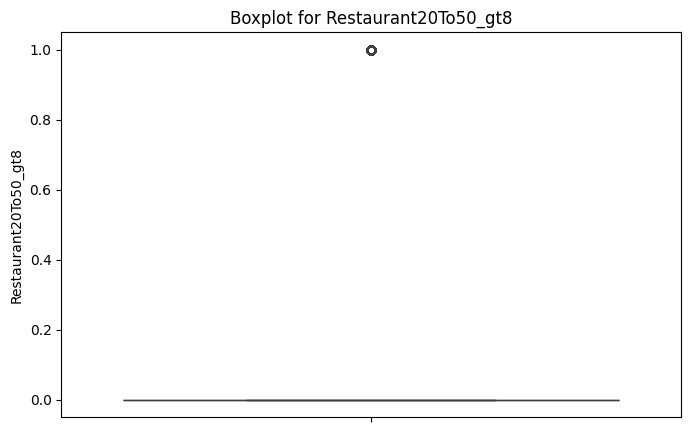

In [381]:
numerical_cols = ['Restaurant20To50_gt8']
plot_boxplots(df, numerical_cols)

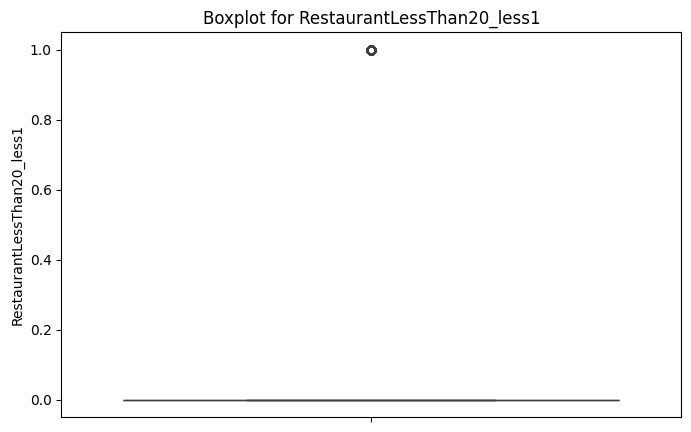

In [382]:
numerical_cols = ['RestaurantLessThan20_less1']
plot_boxplots(df, numerical_cols)

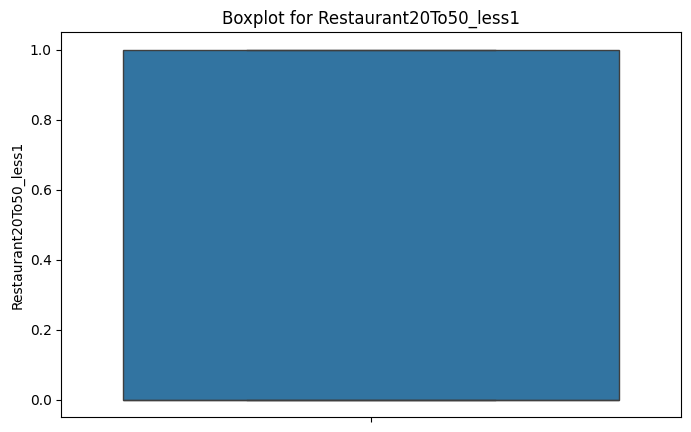

In [383]:
numerical_cols = ['Restaurant20To50_less1']
plot_boxplots(df, numerical_cols)

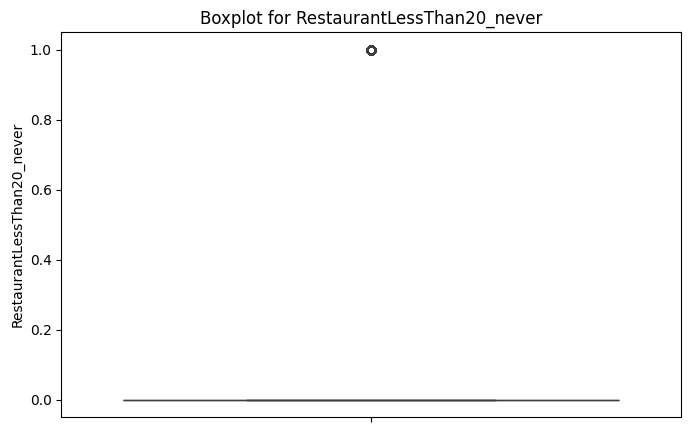

In [384]:
numerical_cols = ['RestaurantLessThan20_never']
plot_boxplots(df, numerical_cols)

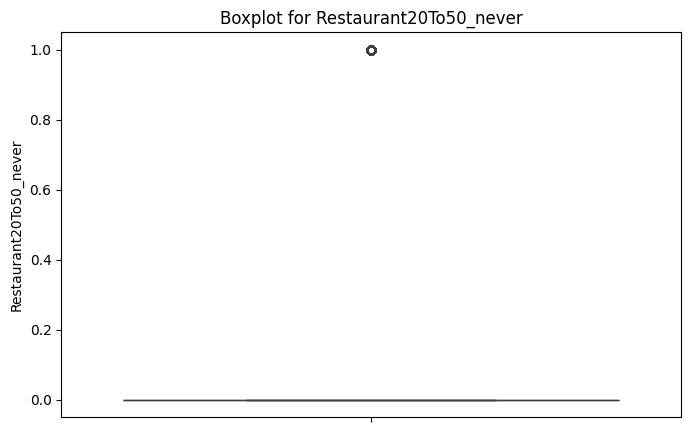

In [385]:
numerical_cols = ['Restaurant20To50_never']
plot_boxplots(df, numerical_cols)

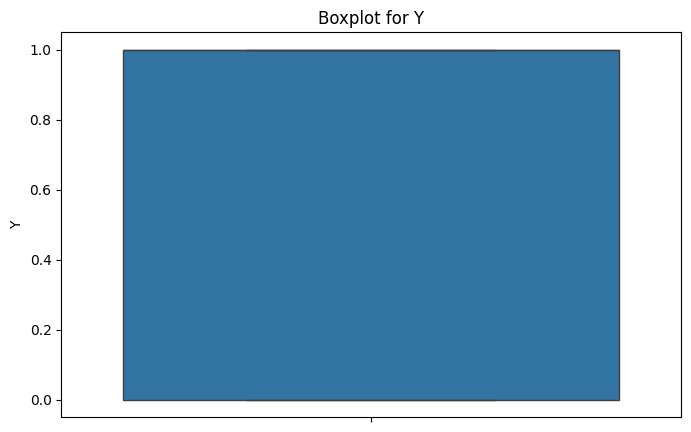

In [386]:
numerical_cols = ['Y']
plot_boxplots(df, numerical_cols)

In [387]:
# Detect and cap outliers using the IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [388]:
# Define acceptable range and cap outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in numerical_cols:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])


In [389]:
# Save cleaning results
print("Data Cleaning Completed!")

Data Cleaning Completed!


**6.EXPLORATORY DATA ANALYSIS(EDA)**

*i.histograms and KDE plots*

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>,
        <Axes: title={'center': 'toCoupon_GEQ15min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>,
        <Axes: title={'center': 'direction_opp'}>],
       [<Axes: title={'center': 'Y'}>, <Axes: >, <Axes: >]], dtype=object)

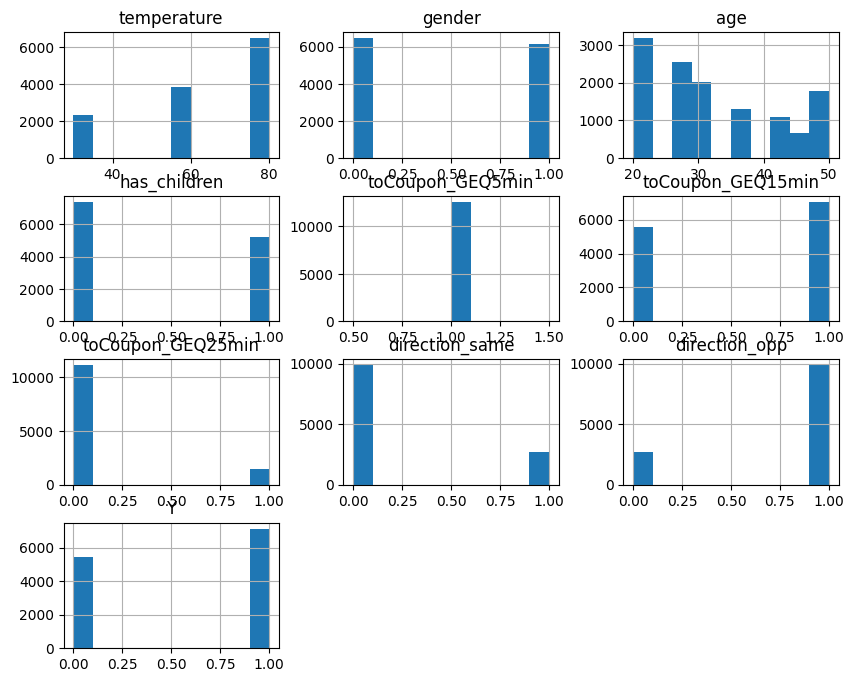

In [390]:
df.hist(figsize=(10,8))

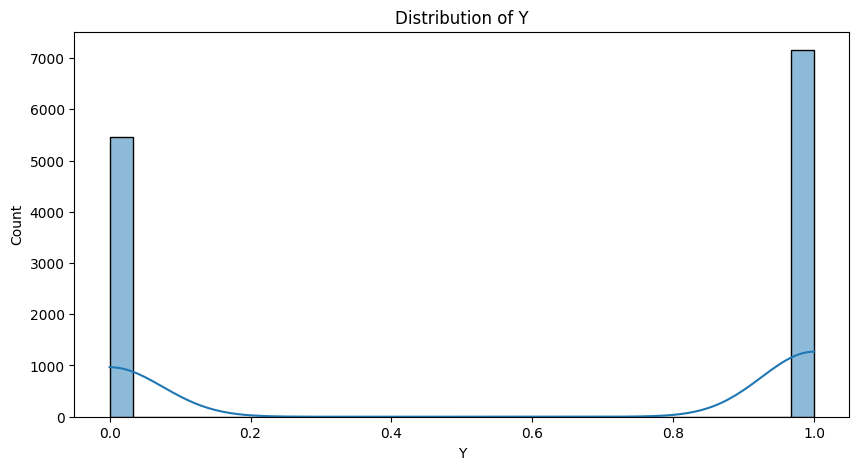

In [391]:
# Histograms and KDE plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

*ii.Correlation Heatmap*

In [392]:
#correlation heatmap
selected_cols = ['temperature', 'age', 'gender', 'has_children', 'toCoupon_GEQ5min',
                  'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
                  'direction_opp', 'Y']

In [393]:
correlation_matrix = df[selected_cols].corr()

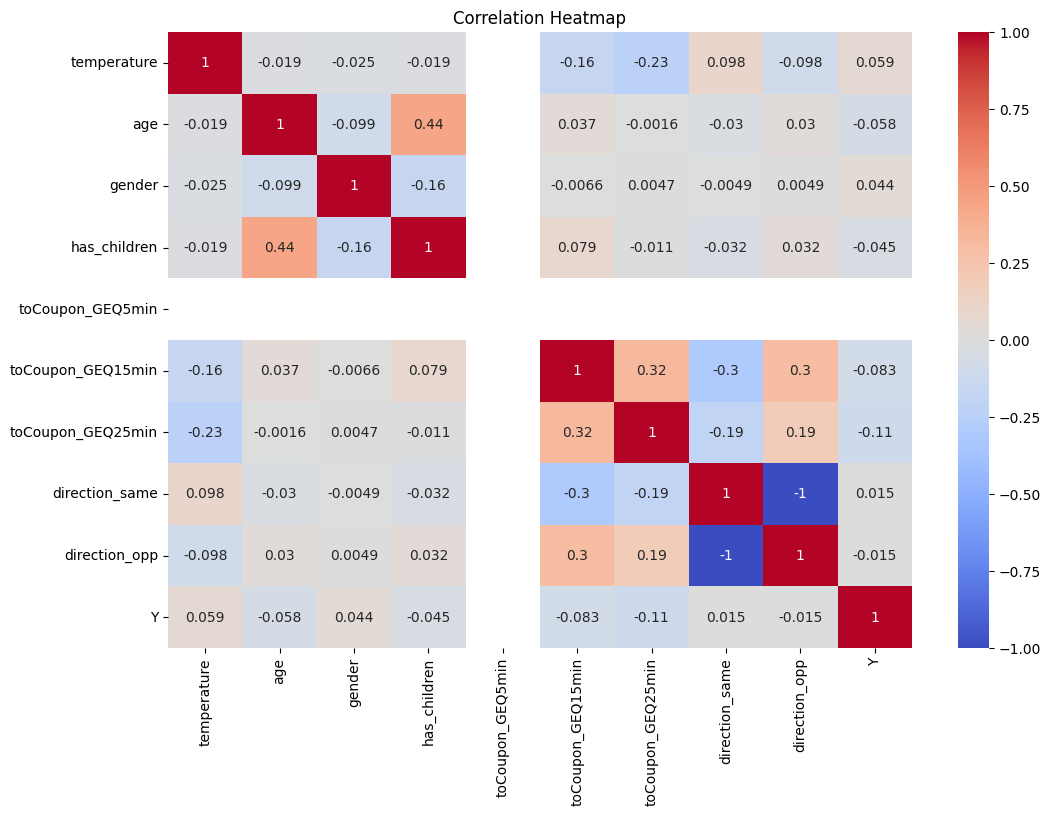

In [394]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*iii.Class Distribution*

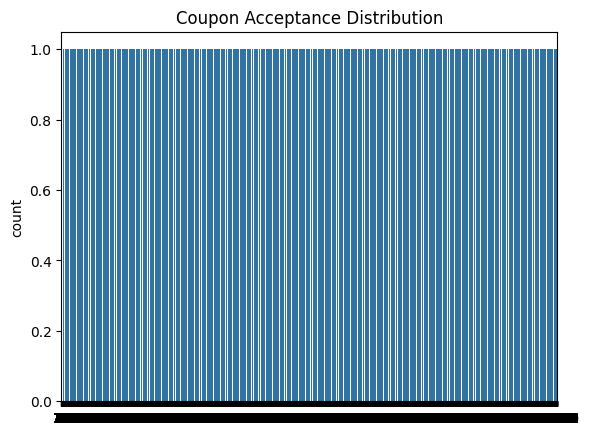

In [395]:
# Check class distribution
sns.countplot(df['Y'])
plt.title('Coupon Acceptance Distribution')
plt.show()

In [396]:
# Filter data: Age > 40 and income == 'Less than $12500'
filtered_df = df[(df['age'] > 40) & (df['income_Less than $12500'] == 1)]

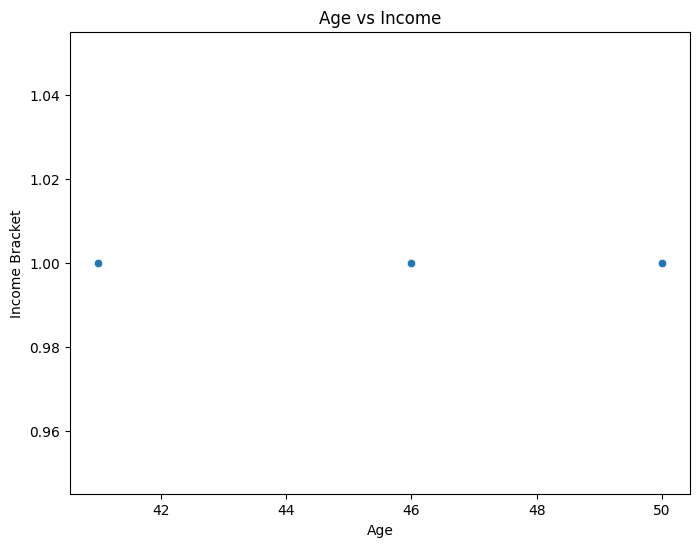

In [397]:
# Age vs Income (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='income_Less than $12500', data=filtered_df)
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income Bracket")
plt.show()


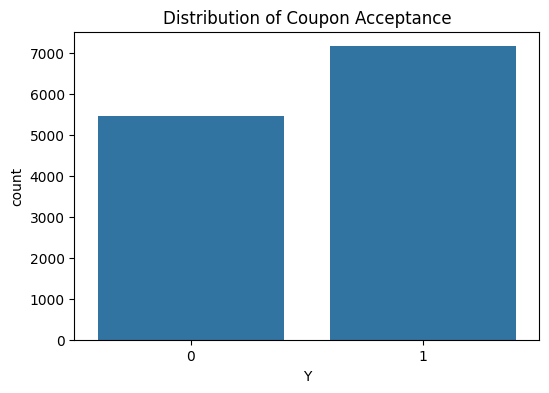

In [398]:
# Distribution of Y (Coupon Acceptance)
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title("Distribution of Coupon Acceptance")
plt.show()


**7.FEATURE ENGINEERING**

In [399]:
encoded_data = pd.get_dummies(df, drop_first=True)

In [400]:
X = df.drop(columns=['Y'])
y = df['Y']

In [401]:
print("Categorical Variables Encoded!")

Categorical Variables Encoded!


**8.FEATURE SELECTION**

*RANDOM FOREST CLASSIFIER*

In [402]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [403]:
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Gender': [0, 1, 1, 0, 1],  # 0: Female, 1: Male
    'Experience': [1, 5, 10, 15, 20],
    'Target': [0, 1, 0, 1, 1]  # Target variable
}

In [404]:
df = pd.DataFrame(data)

In [405]:
# Feature columns and target column
X = df.drop(columns=['Target'])
y = df['Target']

In [406]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [407]:
# Create and fit a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [408]:
# Get feature importances
importances = rf.feature_importances_

In [409]:
# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [410]:
# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [411]:
# Display feature importance
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
      Feature  Importance
1      Salary    0.387097
3  Experience    0.274194
0         Age    0.225806
2      Gender    0.112903


In [412]:
# Set a threshold for removing features
threshold = 0.05
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

In [413]:
# Filter the dataset to include only the important features
X_selected = X[important_features]

In [414]:
# Display the selected features
print("\nSelected Features after Removing Irrelevant/Redundant Features:")
print(X_selected)


Selected Features after Removing Irrelevant/Redundant Features:
   Salary  Experience  Age  Gender
0   50000           1   25       0
1   60000           5   30       1
2   70000          10   35       1
3   80000          15   40       0
4   90000          20   45       1


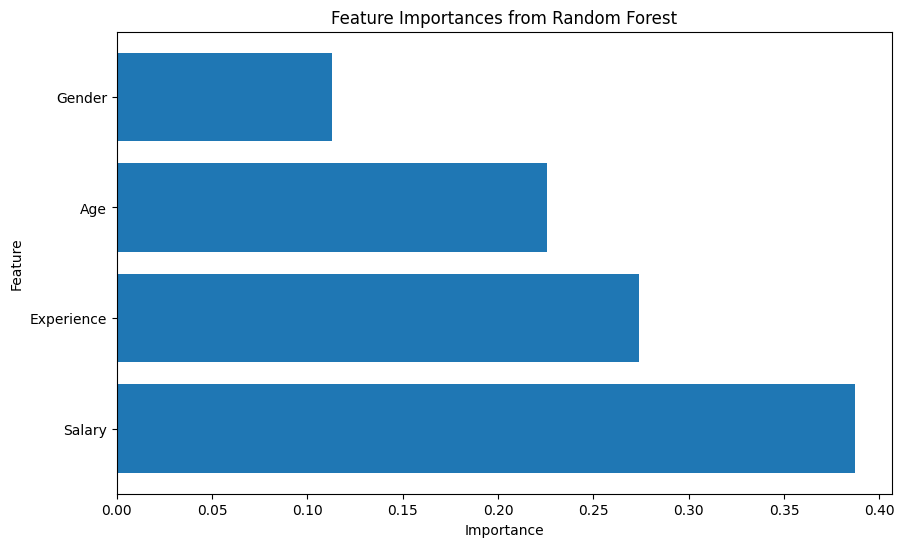

In [415]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

**9.SPLIT DATA INTO TRAINING AND TESTING SETS**

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
# Define the feature matrix (X) and target variable (y)
X = df.drop(columns=['Target'])
y = df['Target']


In [418]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [419]:
# Display the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (3, 4)
Testing Features Shape: (2, 4)
Training Labels Shape: (3,)
Testing Labels Shape: (2,)


**10.FEATURE SCALING**

In [420]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [421]:
# Select numerical features
numerical_features = ['Age', 'Salary', 'Gender', 'Experience']

In [422]:
# Option 1: Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train[numerical_features] = min_max_scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = min_max_scaler.transform(X_test[numerical_features])


In [423]:
# Verify scaling
print("Scaled Training Data (First 5 Rows):")
print(X_train[numerical_features].head())

Scaled Training Data (First 5 Rows):
   Age  Salary  Gender  Experience
2  0.0     0.0     1.0         0.0
3  0.5     0.5     0.0         0.5
4  1.0     1.0     1.0         1.0


In [424]:
print("\nScaled Testing Data (First 5 Rows):")
print(X_test[numerical_features].head())


Scaled Testing Data (First 5 Rows):
   Age  Salary  Gender  Experience
1 -0.5    -0.5     1.0        -0.5
0 -1.0    -1.0     0.0        -0.9


**11.MODEL BUILDING**

*1. Logistic Regression*

In [425]:
from sklearn.linear_model import LogisticRegression

In [426]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [427]:
# Predictions
y_pred = log_reg.predict(X_test)

*2. Random Forest Classifier*

In [428]:
from sklearn.ensemble import RandomForestClassifier

In [429]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [430]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

*3. Support Vector Machine (SVM)*

In [431]:
from sklearn.svm import SVC

In [432]:
# SVM Classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [433]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

*4. Gradient Boosting Classifier*

In [434]:
from sklearn.ensemble import GradientBoostingClassifier

In [435]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [436]:
# Predictions
y_pred_gb = gb_model.predict(X_test)

*5. K-Nearest Neighbors (KNN)*

In [437]:
from sklearn.neighbors import KNeighborsClassifier

In [438]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=min(5, len(X_train)))  # Ensure n_neighbors <= len(X_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [439]:
# Predictions
y_pred_knn = knn_model.predict(X_test)

**12.MODEL EVALUATION**

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier() # Initialize without n_neighbors
}

In [468]:
# Dictionary to store model performance
results = {}

In [456]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [457]:
for idx, (model_name, model) in enumerate(models.items()):
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)


Training Logistic Regression...
Training Random Forest...
Training SVM...
Training Gradient Boosting...
Training KNN...


Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



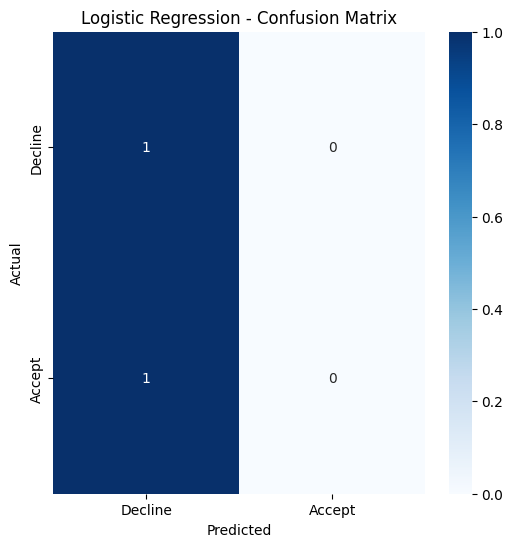

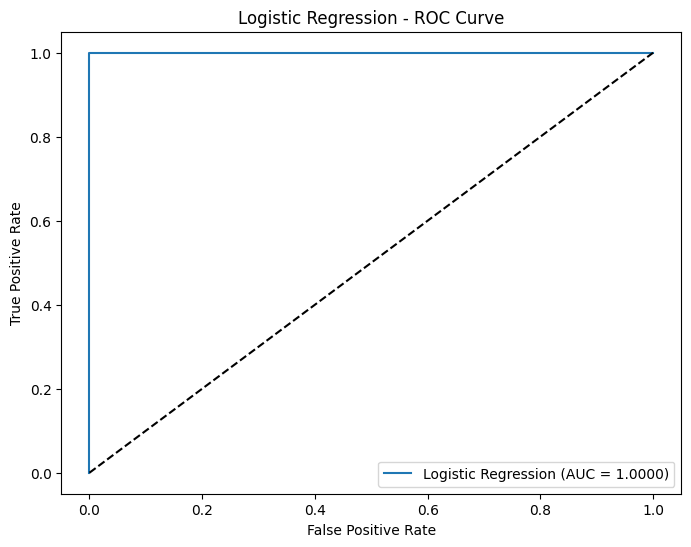

In [458]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model (Logistic Regression)
model_name = "Logistic Regression"
model = LogisticRegression()

# Train the model
print(f"Training {model_name}...")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC, use probabilities of the positive class

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Store results
results = {}
results[model_name] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc,
    "Confusion Matrix": cm
}

# Display results
print(f"\n{model_name} Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
if auc is not None:
    print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Decline", "Accept"], yticklabels=["Decline", "Accept"])
plt.title(f'{model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot ROC curve
if y_pred_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [459]:
# Summary of model performances
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1-Score: {metrics['F1-Score']:.4f}, AUC-ROC: {metrics['AUC']:.4f}" if metrics['AUC'] is not None else f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}")



Model Performance Summary:
Logistic Regression -> Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000, AUC-ROC: 1.0000


Training Random Forest...

Random Forest Results:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



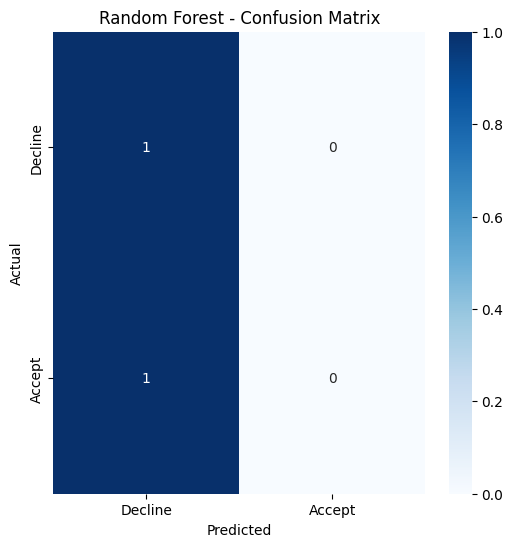

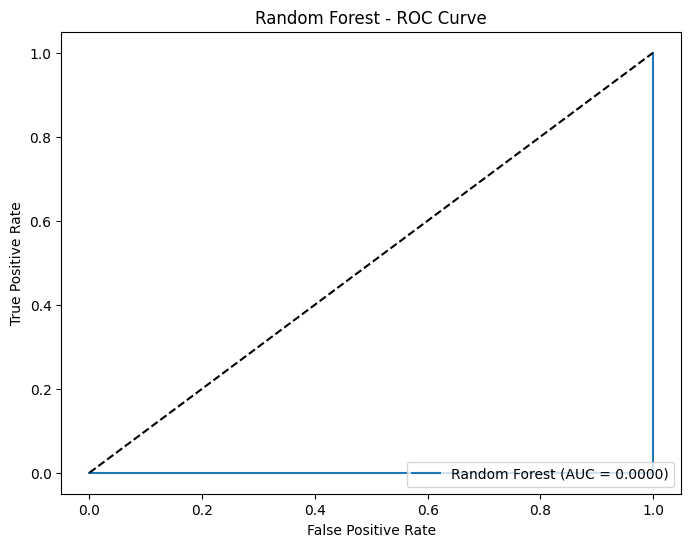

In [460]:
# Initialize the model (Random Forest Classifier)
model_name = "Random Forest"
model = RandomForestClassifier()

# Train the model
print(f"Training {model_name}...")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC, use probabilities of the positive class

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Store results
results = {}
results[model_name] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc,
    "Confusion Matrix": cm
}

# Display results
print(f"\n{model_name} Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
if auc is not None:
    print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Decline", "Accept"], yticklabels=["Decline", "Accept"])
plt.title(f'{model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot ROC curve
if y_pred_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [461]:
# Summary of model performances
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1-Score: {metrics['F1-Score']:.4f}, AUC-ROC: {metrics['AUC']:.4f}" if metrics['AUC'] is not None else f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}")



Model Performance Summary:
Random Forest -> Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000, AUC-ROC: 0.0000


Training Support Vector Machine...

Support Vector Machine Results:
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1-Score: 0.6667
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



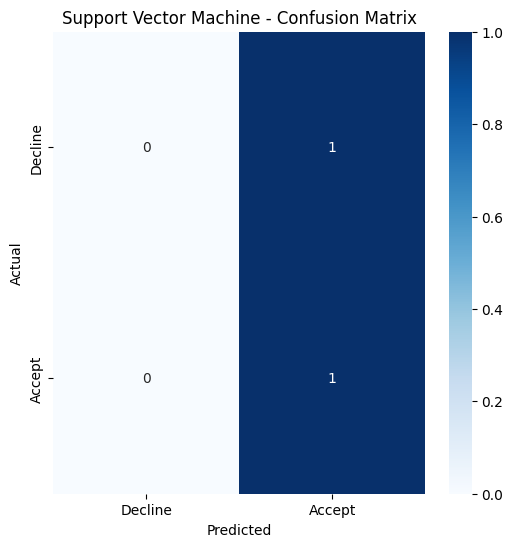

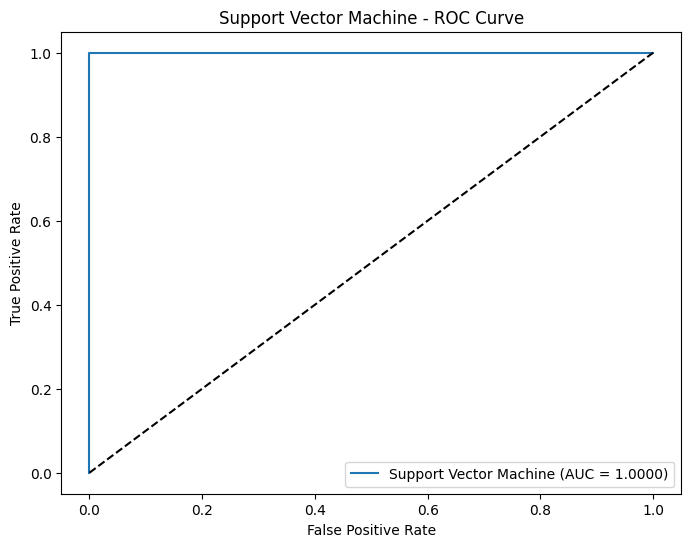

In [462]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model (Support Vector Machine)
model_name = "Support Vector Machine"
model = SVC(probability=True)  # Set probability=True to enable probability estimates for ROC AUC

# Train the model
print(f"Training {model_name}...")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC, use probabilities of the positive class

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Store results
results = {}
results[model_name] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc,
    "Confusion Matrix": cm
}

# Display results
print(f"\n{model_name} Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
if auc is not None:
    print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Decline", "Accept"], yticklabels=["Decline", "Accept"])
plt.title(f'{model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot ROC curve
if y_pred_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [463]:
# Summary of model performances
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1-Score: {metrics['F1-Score']:.4f}, AUC-ROC: {metrics['AUC']:.4f}" if metrics['AUC'] is not None else f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}")



Model Performance Summary:
Support Vector Machine -> Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1-Score: 0.6667, AUC-ROC: 1.0000


Training Gradient Boosting...

Gradient Boosting Results:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



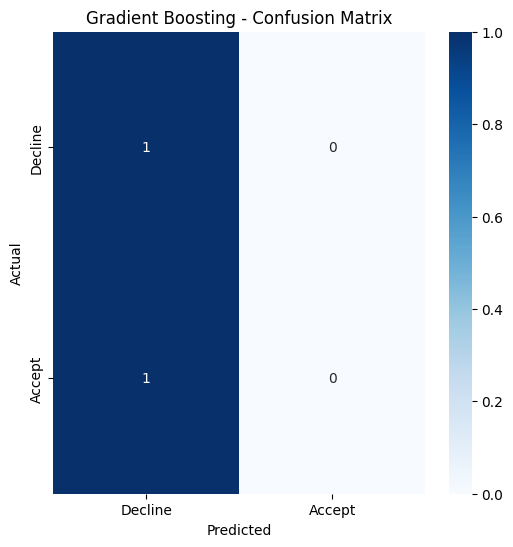

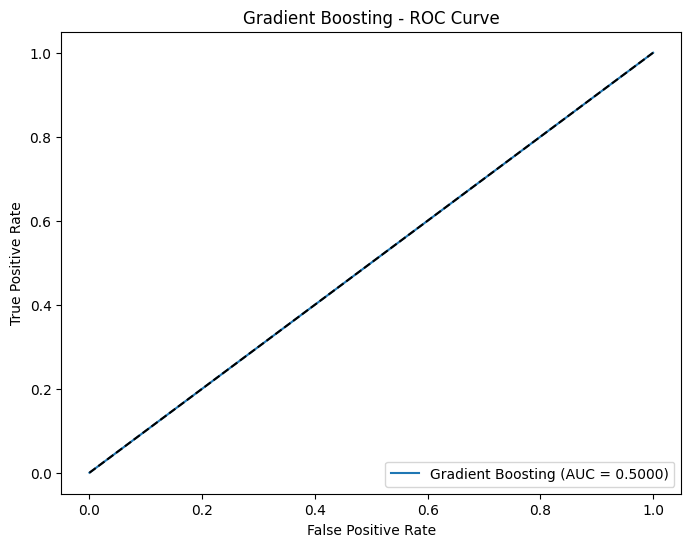

In [464]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model (Gradient Boosting Classifier)
model_name = "Gradient Boosting"
model = GradientBoostingClassifier()

# Train the model
print(f"Training {model_name}...")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC, use probabilities of the positive class

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Store results
results = {}
results[model_name] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc,
    "Confusion Matrix": cm
}

# Display results
print(f"\n{model_name} Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
if auc is not None:
    print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Decline", "Accept"], yticklabels=["Decline", "Accept"])
plt.title(f'{model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot ROC curve
if y_pred_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [465]:
 # Summary of model performances
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1-Score: {metrics['F1-Score']:.4f}, AUC-ROC: {metrics['AUC']:.4f}" if metrics['AUC'] is not None else f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}")



Model Performance Summary:
Gradient Boosting -> Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000, AUC-ROC: 0.5000


Training K-Nearest Neighbors...

K-Nearest Neighbors Results:
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1-Score: 0.6667
AUC-ROC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



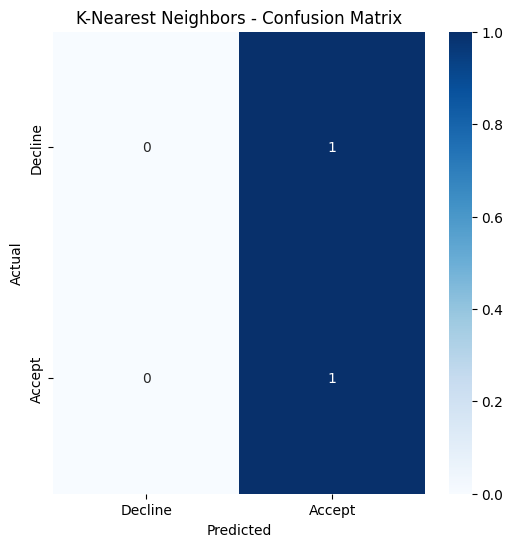

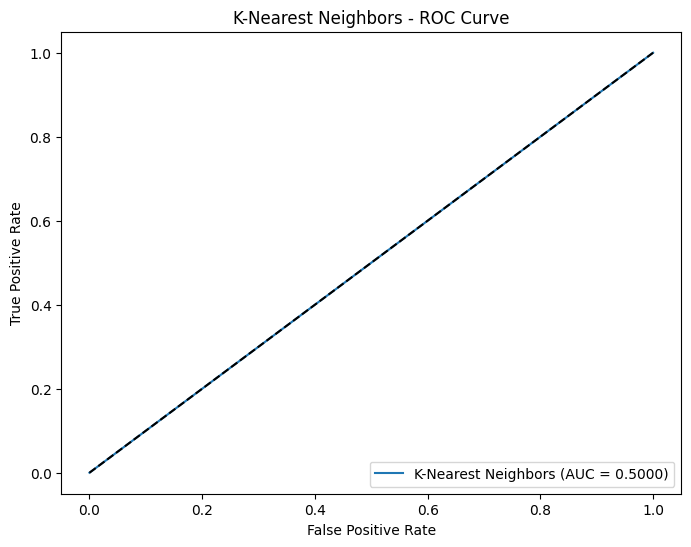

In [466]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model (K-Nearest Neighbors)
model_name = "K-Nearest Neighbors"
model = KNeighborsClassifier()

# Dynamically set n_neighbors for KNN before prediction (can adjust based on your dataset)
model.n_neighbors = min(5, len(X_train))  # Choose the minimum of 5 or the number of samples in the training set

# Train the model
print(f"Training {model_name}...")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC, use probabilities of the positive class

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Store results
results = {}
results[model_name] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc,
    "Confusion Matrix": cm
}

# Display results
print(f"\n{model_name} Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
if auc is not None:
    print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Decline", "Accept"], yticklabels=["Decline", "Accept"])
plt.title(f'{model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot ROC curve
if y_pred_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [467]:
# Summary of model performances
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1-Score: {metrics['F1-Score']:.4f}, AUC-ROC: {metrics['AUC']:.4f}" if metrics['AUC'] is not None else f"{model_name} -> Accuracy: {metrics['Accuracy']:.4f}")



Model Performance Summary:
K-Nearest Neighbors -> Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1-Score: 0.6667, AUC-ROC: 0.5000
